## Importing libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection

In [2]:
%%time
path = r"C:\Users\user\Desktop\Machine learning\Project-1\MNIST"
files = os.listdir(path)
classes = files
X = []
Y = []
for cl in classes:
    pth = path+"\\"+ cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"\\"+img_name,0)
        X.append(img)
        Y.append(cl)

CPU times: total: 3min 44s
Wall time: 10min 13s


A


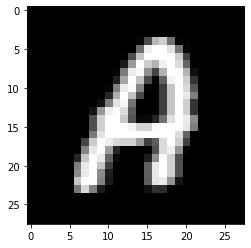

In [3]:
plt.imshow(X[22],cmap='gray')
print(Y[22])

## Converting into numpy array

In [4]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X)) 

<class 'list'>
<class 'numpy.ndarray'>


In [5]:
X.shape

(372451, 28, 28)

## Reshaping the data

In [6]:
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(372451, 784)
(372451,)


## Creating data frame

In [7]:
df = pd.DataFrame(X_new)
df = df.add_prefix('pixel_')
df["Label"] = Y
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


## Converting Data Frame to CSV file

In [55]:
df.to_csv("MINST_A-Z.csv",index=False)

In [2]:
df = pd.read_csv('MINST_A-Z.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

### Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 785 entries, pixel_0 to Label
dtypes: int64(784), object(1)
memory usage: 2.2+ GB


In [6]:
df.shape

(372451, 785)

In [7]:
df.Label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

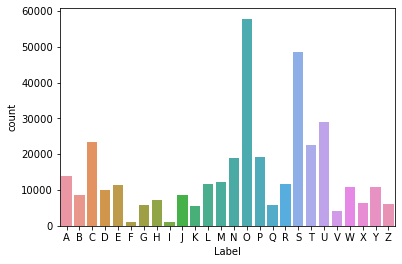

In [8]:
sns.countplot(data=df, x='Label')

### Identifying the inputs (X) and Target Variable (y)

In [4]:
X = df.drop('Label', axis=1)

y = df['Label']

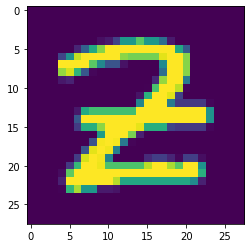

In [10]:
plt.imshow(np.array(X.loc[372450]).reshape(28,28))

###  Splitting the data into Train and Test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Model

### Logistic Regression

In [11]:
%%time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: total: 4min 47s
Wall time: 3min 33s


0.8764511937108674

### Decision Tree 

In [12]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred)

CPU times: total: 2min 12s
Wall time: 2min 17s


0.9479557097290389

### KNN

In [13]:
%%time
from sklearn.neighbors import KNeighborsClassifier

k_classifier = KNeighborsClassifier()
k_classifier.fit(X_train, y_train)

y_test_pred = k_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred) 

CPU times: total: 49min 14s
Wall time: 41min 53s


0.9586953486623779

### Naive Bayes

In [14]:
%%time
from sklearn.naive_bayes import BernoulliNB

pb_classifier = BernoulliNB()
pb_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred)

CPU times: total: 22.8 s
Wall time: 28.6 s


0.9479557097290389

# random forest

In [6]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier() 
rf_classifier.fit(X_train, y_train)
y_test_pred_rndmfrst = rf_classifier.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_rndmfrst)

CPU times: total: 7min 7s
Wall time: 9min 10s


0.9859418126362591

In [226]:
DF={"Model":["Logistic Regression","Naive Bayes","Decision Tree","KNN","Random Forest"],
              "Accuracy_score":[0.8764511937108674,0.9479557097290389,0.9479557097290389,0.9586953486623779,0.9859632919141258]}

In [227]:
prediction_value = pd.DataFrame(DF)
prediction_value

,Model,Accuracy_score
0,Logistic Regression,0.876451
1,Naive Bayes,0.947956
2,Decision Tree,0.947956
3,KNN,0.958695
4,Random Forest,0.985963


<AxesSubplot:xlabel='Model', ylabel='Accuracy_score'>

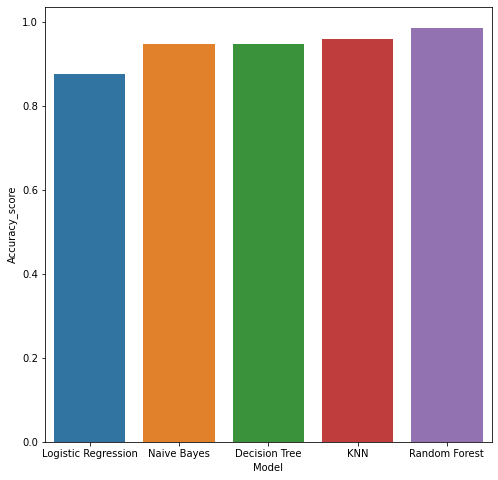

In [228]:
plt.figure(figsize=(8,8))
sns.barplot(data=prediction_value,x='Model',y='Accuracy_score')

In [6]:
import pickle

In [8]:
pickle.dump(rf_classifier, open('model.pkl','wb'))

In [7]:
model = pickle.load(open('model.pkl','rb'))

# Prediction

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: Us

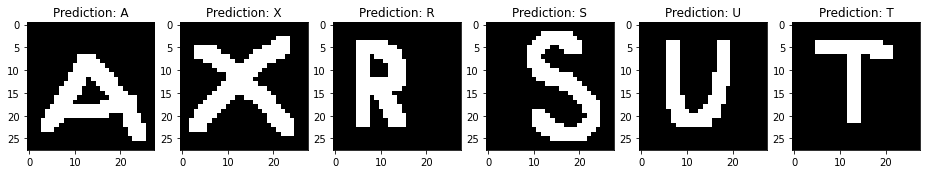

In [229]:
path = r"C:\Users\user\Desktop\Machine learning\Project-1\Test"
files = os.listdir(path)
image=[]
for i in files:
    img = cv2.imread(path+"\\"+i,0)
    image.append(img)
plt.figure(figsize = (16,16))
for i in range(6):  
    plt.subplot(1, 6, i+1)
    plt.imshow(image[i],cmap='gray')
    image[i].resize(28,28)
    prediction = model.predict(image[i].reshape(1,784))
    pred = prediction.reshape(1)[0]
    plt.title("Prediction: "+pred)